# Wine
These data are the results of a chemical analysis of wines grown in the same region in Italy but derived from three different cultivars. The analysis determined the quantities of 13 constituents found in each of the three types of wines.

Number of Instances: 178
Number of Attributes: 13
Associated Tasks: Classification

In [1]:
#import essential libaries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use("dark_background")

import warnings
warnings.filterwarnings("ignore")

In [2]:
data=pd.read_csv("wine.csv")      #Import dataset
data.head()

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline,Class Label
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,NaN,5.64,1.04,NaN,1065,0
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,0
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,0
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,0
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,0


In [3]:
print("Dataset information-->")                  
print(data.info())                              #Dataset info 
print("Dataset shape---->")
print(data.shape)                               #shape of dataset
print("Dataset description----->")
print(data.describe())                          #statistics of datsset
print("Summatio of missing value---->")
print(data.isnull().sum())                      #missing value 

Dataset information-->
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Alcohol                       178 non-null    float64
 1   Malic acid                    178 non-null    float64
 2   Ash                           178 non-null    float64
 3   Alcalinity of ash             178 non-null    float64
 4   Magnesium                     178 non-null    int64  
 5   Total phenols                 178 non-null    float64
 6   Flavanoids                    178 non-null    float64
 7   Nonflavanoid phenols          178 non-null    float64
 8   Proanthocyanins               177 non-null    float64
 9   Color intensity               178 non-null    float64
 10  Hue                           178 non-null    float64
 11  OD280/OD315 of diluted wines  177 non-null    float64
 12  Proline                       178 non-nul

-All variables are int and only numerical value is there no cateforical value present in dataset         
-In two columns(Proanthocyanins & OD280/OD315 of diluted wines) have one one missing value

<AxesSubplot:xlabel='Proanthocyanins', ylabel='OD280/OD315 of diluted wines'>

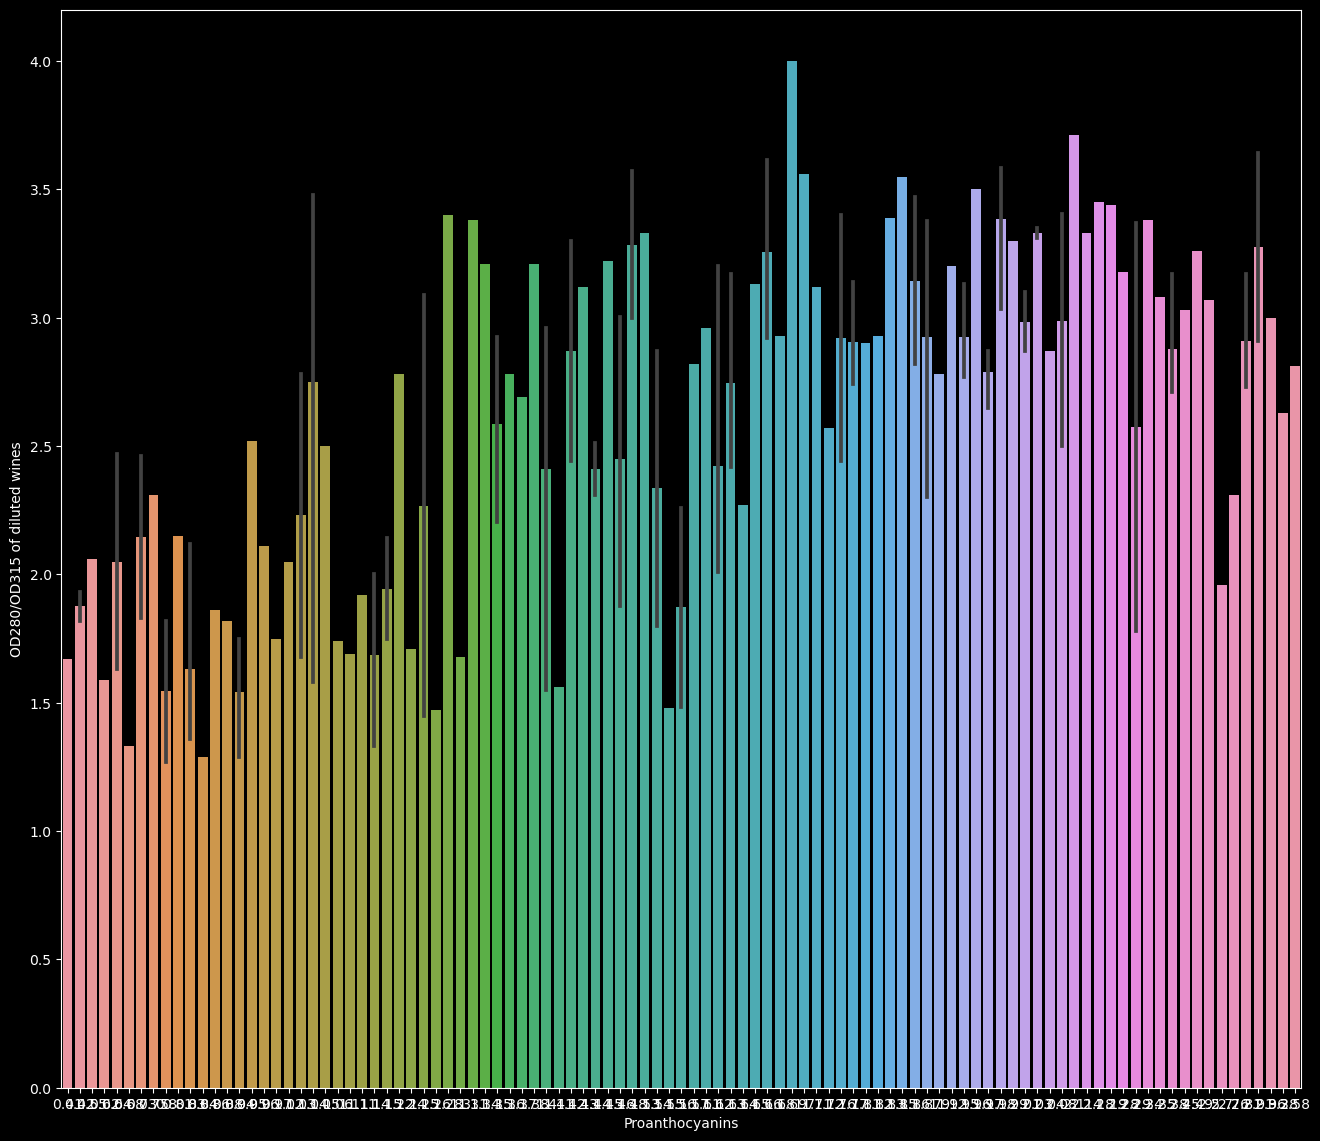

In [4]:
plt.figure(figsize=(16,14))
sns.barplot(x="Proanthocyanins",y="OD280/OD315 of diluted wines",data=data)

In [5]:
a = data["OD280/OD315 of diluted wines"].mean()                      #Mean calculae
print("Mean of OD280/OD315 of diluted wines variables: ",a)

b = data["OD280/OD315 of diluted wines"].median()                    #Median calculate          
print("Median of OD280/OD315 of diluted wines variables: ",b)

c = data["OD280/OD315 of diluted wines"].mode()                      #Model calculate
print("Mode of OD280/OD315 of diluted wines variables: ",c)

#Filling the missing value with edian
data["OD280/OD315 of diluted wines"].fillna(b,inplace=True)
print("OD280/OD315 of diluted wines variables filled with: ",b)

Mean of OD280/OD315 of diluted wines variables:  2.604293785310733
Median of OD280/OD315 of diluted wines variables:  2.78
Mode of OD280/OD315 of diluted wines variables:  0    2.87
dtype: float64
OD280/OD315 of diluted wines variables filled with:  2.78


In [6]:
a = data["Proanthocyanins"].mean()                      #Mean calculae
print("Mean of Proanthocyanins variables: ",a)

b = data["Proanthocyanins"].median()                    #Median calculate          
print("Median of Proanthocyanins variables: ",b)

c = data["Proanthocyanins"].mode()                      #Model calculate
print("Mode of Proanthocyanins variables: ",c)

#Filling the missing value with edian
data["Proanthocyanins"].fillna(b,inplace=True)
print("Proanthocyanins variables filled with: ",b)

Mean of Proanthocyanins variables:  1.586949152542374
Median of Proanthocyanins variables:  1.55
Mode of Proanthocyanins variables:  0    1.35
dtype: float64
Proanthocyanins variables filled with:  1.55


In [8]:
#Split the data into features and labels
x=data.drop("Class Label",axis=1)            #Features
y=data["Class Label"]                        #labels
print("Features and labels seperation done!")


#Split data into train test-->
from sklearn.model_selection import train_test_split              #train test split 
x_train,x_test,y_train,y_test=train_test_split(x,y,                                 
                                               test_size=0.2,
                                               random_state=42
                                              )                     
print("Train test split done!")

print("Shape of x_train is: ",x_train.shape)                  #x_train shape print
print("Shape of x_test is: ",x_test.shape)                    #x_test shape print
print("Shape of y_train is: ",y_train.shape)                  #y_train shape print
print("Shape of y_test is: ",y_test.shape)                    #y_test shape print

print("All train test split done perfectly!")

Features and labels seperation done!
Train test split done!
Shape of x_train is:  (142, 13)
Shape of x_test is:  (36, 13)
Shape of y_train is:  (142,)
Shape of y_test is:  (36,)
All train test split done perfectly!


# Model Build

In [9]:
#scaling all variables by StandardScaler-->
from sklearn.preprocessing import StandardScaler           #import StandardScaler
from sklearn.ensemble import RandomForestClassifier        #Import randomclassifier algorithm
from sklearn import pipeline                               #Import pipeline

In [31]:
#create pipeline
my_pipeline=Pipeline(
    steps=[("scaler",StandardScaler())                    #Standard scaling pipeline
          ])

In [32]:
#fit train data in standard scaling pipeline
my_pipeline.fit(x_train,y_train)

Pipeline(steps=[('scaler', StandardScaler())])

In [33]:
#add algorithm to standard scaing pipeline
pipe=Pipeline(
    steps=[("preprocessor",my_pipeline),
          ("RM",RandomForestClassifier())                  #add randomforestclassifier algorithm
          ])

In [34]:
from sklearn import set_config
set_config(display="diagram")
pipe

Pipeline(steps=[('preprocessor',
                 Pipeline(steps=[('scaler', StandardScaler())])),
                ('RM', RandomForestClassifier())])

In [65]:
#Hypermeter tuning
param_grid = {
    "RM__n_estimators": [200,300]
}

grid_search = GridSearchCV(pipe, param_grid=param_grid, n_jobs=1)           #gridserach parameters

#Set parameters to training data
grid_search.fit(x_train,y_train)       

GridSearchCV(estimator=Pipeline(steps=[('preprocessor',
                                        Pipeline(steps=[('scaler',
                                                         StandardScaler())])),
                                       ('RM',
                                        RandomForestClassifier(n_estimators=200))]),
             n_jobs=1, param_grid={'RM__n_estimators': [200, 300]})

In [36]:
#finding best parameter for the model
grid_search.best_params_ 

{'RM__n_estimators': 300}

In [37]:
#Add best parameters to algorithm
pipe=Pipeline(
    steps=[("preprocessor",my_pipeline),
          ("RM",RandomForestClassifier(n_estimators=200))
          ])

In [38]:
#fit the training data to updated pipeline
pipe.fit(x_train,y_train)

Pipeline(steps=[('preprocessor',
                 Pipeline(steps=[('scaler', StandardScaler())])),
                ('RM', RandomForestClassifier(n_estimators=200))])

In [46]:
#predict the test data
test_prediction=pipe.predict(x_test)

In [47]:
#Create a dataframe of actual labels and model predicted labels
final_result=pd.DataFrame({"Actual":y_test,"Prediction":test_prediction})

In [48]:
#display acctual and model predictied o/p
final_result.head()

,Actual,Prediction
19,0,0
45,0,0
140,2,2
30,0,0
67,1,1


In [50]:
#accuracy of the model
from sklearn.metrics import accuracy_score                       #import accuracy_score

#Accuracy calculation
accuracy_test=accuracy_score(y_test,a)*100   
print(f"Accuracy of the model is: ",accuracy_test)

Accuracy of the model is:  100.0
